# Word Cloud

아래 실습은 wordclod, konlpy 라이브러리가 필요합니다.

wordclod는 아래와 같이 간편하게 설치할 수 있습니다.

- !pip install wordcloud

윈도우에 konlpy를 설치하는 방법은 좀 복잡합니다. 공식 문서와 기타 블로그를 보면서 설치해보세요.

- konlpy 문서: https://konlpy-ko.readthedocs.io/ko/v0.4.3/

In [1]:
from wordcloud import WordCloud

# 한글로 출력되게 하려면, 한글 font를 경로로 지정해줘야 합니다.
font_path = "C:/WINDOWS/FONTS/BATANG.TTC"

wordcloud = WordCloud(
    font_path=font_path,
    width = 1000,
    height = 1000,
    background_color="white",
)

keywords = {
    "언어": 31, 
    "지능":23,
    "컴퓨터": 11,
    "말":25,
    "머신러닝": 9,
    "구김살": 10,
    "이미지": 3   
}
wordcloud = wordcloud.generate_from_frequencies(keywords)

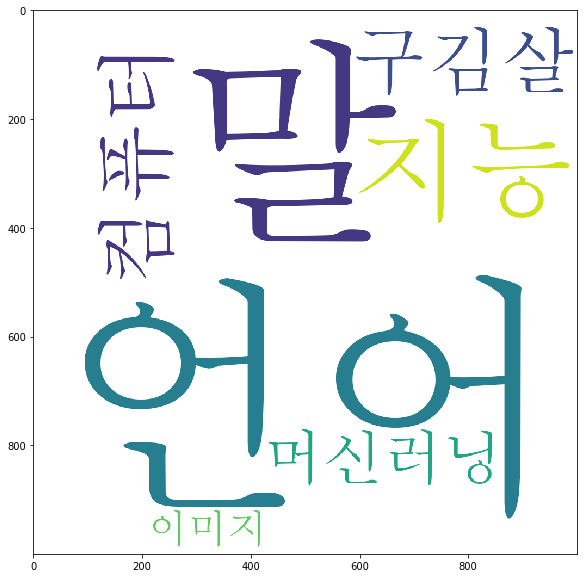

In [2]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.to_array())
plt.show()

# 위키백과 "인공지능" 항목

단순히 띄어쓰기를 기준으로 단어를 나눠보겠습니다.

In [3]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

r = requests.get("https://ko.wikipedia.org/wiki/인공지능")
bs = BeautifulSoup(r.text)
text = ''.join([paragraph.text for paragraph in bs.select("#bodyContent p")])
counter = Counter(text.split())
wordcloud = wordcloud.generate_from_frequencies(counter)

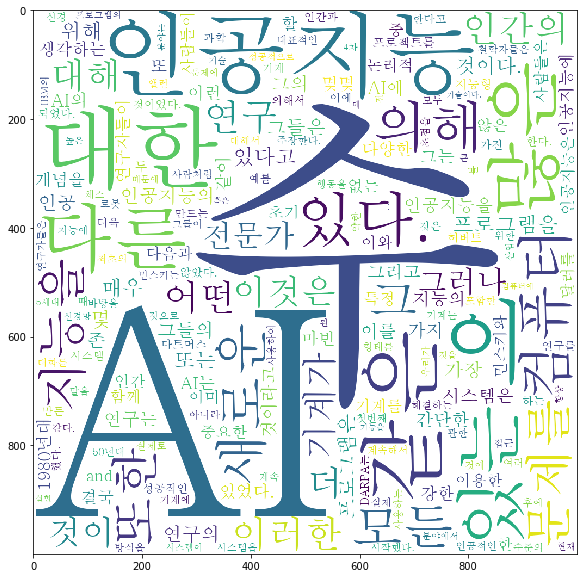

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.to_array())
plt.show()

# 명사만 이용한 워드 클라우드

`konlpy`를 이용해 명사만 추출해 워드 클라우드를 그려보겠습니다. (한 글자 단어도 제외)

In [5]:
from konlpy.tag import Komoran

tokenizer = Komoran()
nouns = tokenizer.nouns(text)
nouns = [n for n in nouns if len(n)>1]
counter = Counter(nouns)
wordcloud = wordcloud.generate_from_frequencies(counter)

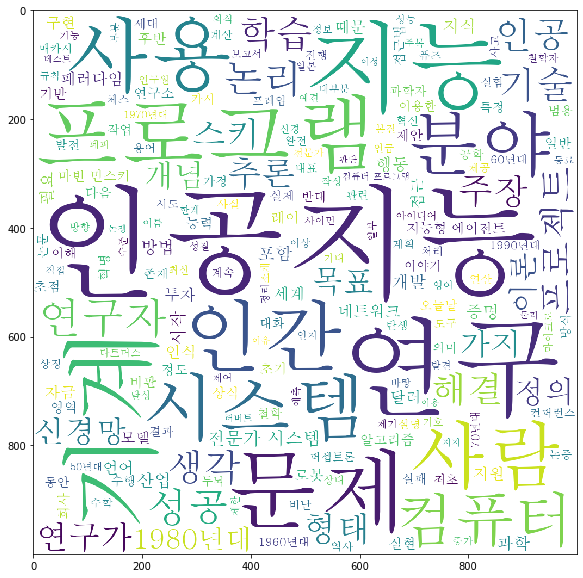

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.to_array())
plt.show()